In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import os
import json




In [2]:
ALL_EXP_PATH = r"C:\Users\karl\Desktop\DeliNet\src\models\exps"

def read_json(exp_name, top25=True):
    all_data = []
    all_names = []
    exp_full_path = os.path.join(ALL_EXP_PATH, exp_name)
    for model_name in sorted(os.listdir(exp_full_path)):
        path = os.path.join(exp_full_path, model_name, "meta.json")
        f = open(path)
        data = json.load(f)
        data = data["top x test acc:"]
        data = np.asarray(data)
        if top25:
            data = data[:,2] 
        else:
            data = data[:,1]
            print("using top10%")
        all_data.append(data)
        all_names.append(model_name)
       
            
    return all_data, all_names
    
read_json("Aug_exp");

In [3]:

def plot_(exp_name, fig_name="test", custom_names = None, aspect_ratio=(10, 5), ylim=(0.5, 0.9)):
    data, names = read_json(exp_name)
    min_epochs = min([d.size for d in data])
    for i, name in enumerate(names): print(i, name)
    print("\n")
    if custom_names is not None:
        names = custom_names
        for i, name in enumerate(names): print(i, name)
        
    fig = plt.figure(figsize=aspect_ratio)
    for acc, name in zip(data, names):
        plt.plot(acc[:min_epochs], label=name)
    plt.ylim(ylim)
    plt.title(fig_name)
    plt.tight_layout()
    plt.ylabel("test accuracy")
    plt.xlabel("epochs")
    plt.legend()
    plt.tight_layout()
    plt.savefig(exp_name + ".png", dpi=150)
    plt.show()

0 EfficientTrans_AND_DistilBert_mono
1 EfficientTrans_AND_DistilBert_mono_AutoAugment
2 EfficientTrans_AND_DistilBert_mono_RandAugment
3 EfficientTrans_AND_DistilBert_mono_TrivialAugmentWide


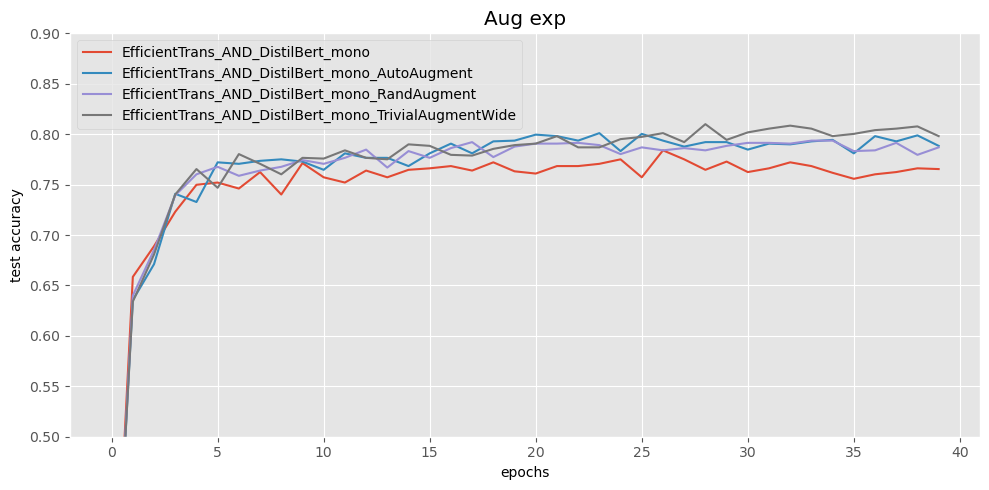

In [4]:
plot_("Aug_exp", fig_name="Aug exp")

0 EfficientTransNonPre_AND_DistilBert_mono
1 EfficientTransNonPre_AND_DistilBert_mono_NonPre
2 EfficientTrans_AND_DistilBert_mono
3 EfficientTrans_AND_DistilBert_mono_NonPre


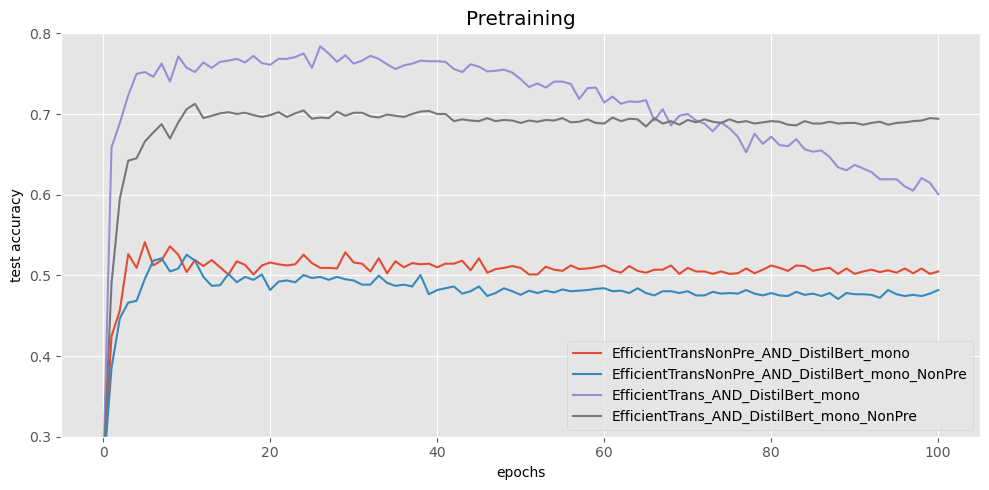

In [5]:
plot_("pretrained_exp", fig_name="Pretraining" ,ylim=(0.3, 0.8))

0 EfficientTrans_AND_DistilBert_2xInp
1 EfficientTrans_AND_DistilBert_2xNet
2 EfficientTrans_AND_DistilBert_3xInp
3 EfficientTrans_AND_DistilBert_3xNet
4 EfficientTrans_AND_DistilBert_mono


0 title + recipe        (2 inp)
1 title + recipe        (2 net)
2 title + recipe + desc (3 inp)
3 title + recipe + desc (3 net)
4 title only


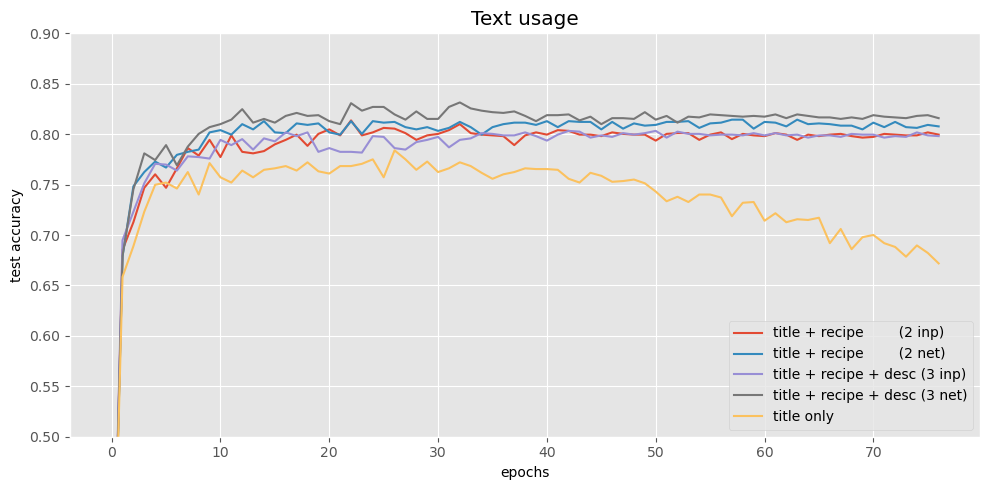

In [6]:
plot_("Text_backbone_exp", fig_name="Text usage", custom_names=[
      "title + recipe        (2 inp)",
      "title + recipe        (2 net)",
      "title + recipe + desc (3 inp)",
      "title + recipe + desc (3 net)",
      "title only",
])

0 EfficientTrans_AND_DistilBert_mono
1 Efficientnet4_AND_DistilBert_mono
2 ResNet18_AND_DistilBert_mono
3 ResNet50_AND_DistilBert_mono
4 ViT_AND_DistilBert_mono


0 Efficeint Trans
1 Efficeint Net
2 Res18
3 Res50
4 ViT


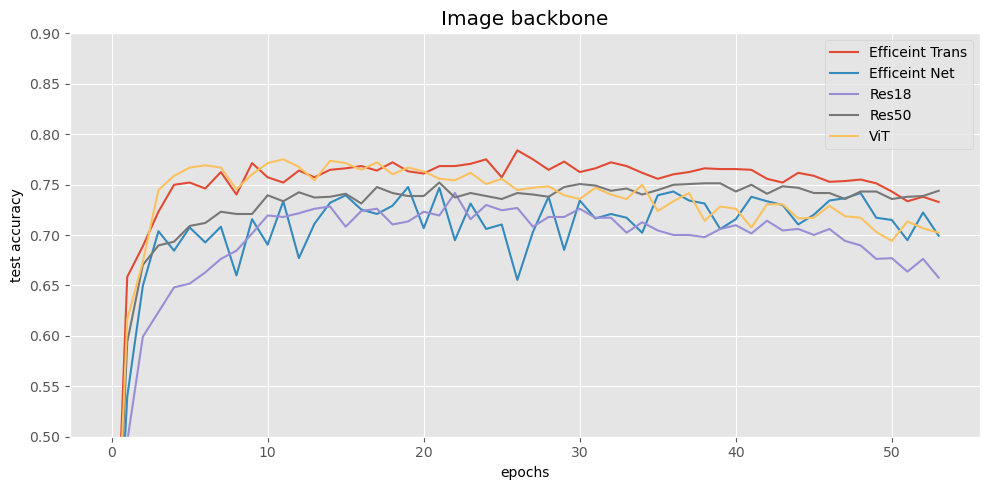

In [7]:
plot_("Vision_backbone_exp", fig_name="Image backbone",
      custom_names=[ "Efficeint Trans", "Efficeint Net", "Res18", "Res50", "ViT"
          
      ])

In [20]:


our_best = [[0, 0.1, 0.25], [0.003711952487008166, 0.4142538975501113, 0.7089829250185598], [0.007423904974016332, 0.4780994803266518, 0.7520415738678544], [0.011135857461024499, 0.4892353377876763, 0.771343726800297], [0.011878247958426132, 0.5077951002227171, 0.7787676317743133], [0.011135857461024499, 0.5107646622123236, 0.7787676317743133], [0.008908685968819599, 0.5308092056421677, 0.8040089086859687], [0.010393466963622866, 0.540460282108389, 0.8151447661469933], [0.011135857461024499, 0.5471417965850037, 0.8173719376391981], [0.012620638455827764, 0.5419450631031922, 0.8158871566443949], [0.011135857461024499, 0.5256124721603563, 0.8114328136599851], [0.015590200445434297, 0.5196733481811433, 0.8181143281365998], [0.014105419450631032, 0.5345211581291759, 0.8210838901262063], [0.008908685968819599, 0.5463994060876021, 0.8151447661469933], [0.007423904974016332, 0.5515961395694134, 0.8166295471417966], [0.011878247958426132, 0.568671121009651, 0.8270230141054195], [0.009651076466221232, 0.5463994060876021, 0.8262806236080178], [0.013363028953229397, 0.5575352635486266, 0.8292501855976243], [0.011878247958426132, 0.5523385300668151, 0.8210838901262063], [0.015590200445434297, 0.5619896065330363, 0.8210838901262063], [0.011135857461024499, 0.5590200445434298, 0.829992576095026], [0.011878247958426132, 0.5449146250927988, 0.8344469190794358], [0.011878247958426132, 0.5657015590200445, 0.829992576095026], [0.011878247958426132, 0.5523385300668151, 0.8292501855976243], [0.014847809948032665, 0.562731997030438, 0.8285077951002227], [0.009651076466221232, 0.5701559020044543, 0.8255382331106161], [0.014847809948032665, 0.562731997030438, 0.8270230141054195], [0.017074981440237565, 0.5590200445434298, 0.8351893095768373], [0.011878247958426132, 0.5746102449888641, 0.8285077951002227], [0.016332590942835932, 0.570898292501856, 0.8351893095768373], [0.013363028953229397, 0.5664439495174461, 0.835931700074239], [0.01855976243504083, 0.5864884929472902, 0.8307349665924276], [0.016332590942835932, 0.5812917594654788, 0.8240534521158129], [0.009651076466221232, 0.5820341499628805, 0.8314773570898292], [0.005939123979213066, 0.5775798069784707, 0.8411284335560505], [0.016332590942835932, 0.568671121009651, 0.8396436525612472], [0.005939123979213066, 0.5753526354862657, 0.835931700074239], [0.012620638455827764, 0.5783221974758723, 0.8389012620638455], [0.011878247958426132, 0.5738678544914625, 0.8351893095768373], [0.014847809948032665, 0.5790645879732739, 0.8285077951002227], [0.014847809948032665, 0.5835189309576837, 0.8255382331106161], [0.017817371937639197, 0.5760950259836674, 0.8337045285820341], [0.014105419450631032, 0.5760950259836674, 0.835931700074239], [0.014847809948032665, 0.5798069784706755, 0.8262806236080178], [0.009651076466221232, 0.5738678544914625, 0.829992576095026], [0.009651076466221232, 0.576837416481069, 0.8270230141054195], [0.011135857461024499, 0.5716406829992576, 0.8314773570898292], [0.012620638455827764, 0.5701559020044543, 0.835931700074239], [0.017074981440237565, 0.576837416481069, 0.8314773570898292], [0.016332590942835932, 0.5716406829992576, 0.8270230141054195], [0.015590200445434297, 0.5783221974758723, 0.8285077951002227], [0.016332590942835932, 0.5760950259836674, 0.8262806236080178], [0.016332590942835932, 0.5701559020044543, 0.8307349665924276], [0.016332590942835932, 0.5798069784706755, 0.829992576095026], [0.014105419450631032, 0.5798069784706755, 0.8322197475872308], [0.015590200445434297, 0.5716406829992576, 0.8292501855976243], [0.014105419450631032, 0.5738678544914625, 0.8292501855976243], [0.017074981440237565, 0.5812917594654788, 0.8307349665924276], [0.017817371937639197, 0.5738678544914625, 0.8307349665924276], [0.013363028953229397, 0.5775798069784707, 0.8270230141054195], [0.013363028953229397, 0.5753526354862657, 0.829992576095026], [0.017817371937639197, 0.5753526354862657, 0.8322197475872308], [0.014847809948032665, 0.5783221974758723, 0.8270230141054195], [0.014847809948032665, 0.5798069784706755, 0.827765404602821], [0.016332590942835932, 0.5798069784706755, 0.829992576095026], [0.017074981440237565, 0.5775798069784707, 0.8314773570898292], [0.017817371937639197, 0.5798069784706755, 0.8292501855976243], [0.017074981440237565, 0.5783221974758723, 0.827765404602821], [0.01855976243504083, 0.5805493689680772, 0.8307349665924276], [0.015590200445434297, 0.5798069784706755, 0.8314773570898292], [0.014847809948032665, 0.5746102449888641, 0.8285077951002227], [0.017074981440237565, 0.5812917594654788, 0.8255382331106161], [0.016332590942835932, 0.5820341499628805, 0.8285077951002227], [0.017817371937639197, 0.5812917594654788, 0.8314773570898292], [0.019302152932442463, 0.5775798069784707, 0.8285077951002227], [0.015590200445434297, 0.5783221974758723, 0.8307349665924276], [0.01855976243504083, 0.5783221974758723, 0.829992576095026], [0.017817371937639197, 0.5746102449888641, 0.8322197475872308], [0.016332590942835932, 0.5753526354862657, 0.827765404602821], [0.019302152932442463, 0.5775798069784707, 0.8292501855976243], [0.016332590942835932, 0.5805493689680772, 0.8285077951002227], [0.01855976243504083, 0.5812917594654788, 0.8292501855976243], [0.016332590942835932, 0.5820341499628805, 0.827765404602821], [0.020786933927245732, 0.5746102449888641, 0.8262806236080178], [0.017074981440237565, 0.5820341499628805, 0.8270230141054195], [0.017074981440237565, 0.5783221974758723, 0.8292501855976243], [0.017074981440237565, 0.5820341499628805, 0.8322197475872308], [0.020786933927245732, 0.5775798069784707, 0.8262806236080178], [0.01855976243504083, 0.5835189309576837, 0.8307349665924276], [0.017074981440237565, 0.5790645879732739, 0.829992576095026], [0.01855976243504083, 0.5812917594654788, 0.8285077951002227], [0.01855976243504083, 0.5842613214550854, 0.827765404602821], [0.017074981440237565, 0.5783221974758723, 0.829992576095026], [0.017817371937639197, 0.5783221974758723, 0.8329621380846325], [0.017074981440237565, 0.5820341499628805, 0.8270230141054195], [0.014847809948032665, 0.5820341499628805, 0.8240534521158129], [0.019302152932442463, 0.5798069784706755, 0.829992576095026], [0.015590200445434297, 0.5731254639940608, 0.8322197475872308], [0.012620638455827764, 0.5798069784706755, 0.8307349665924276], [0.017817371937639197, 0.5753526354862657, 0.8322197475872308], [0.017817371937639197, 0.5820341499628805, 0.8292501855976243]]

our_best = np.array(our_best)

print(np.max(our_best, axis=0))
print((our_best[83]))


[0.02078693 0.58648849 0.84112843]
[0.02078693 0.57461024 0.82628062]


In [25]:
our_baseline =  [[0, 0.1, 0.25], [0.005939123979213066, 0.36971046770601335, 0.6585003711952486], [0.006681514476614699, 0.40311804008908686, 0.6889383815887157], [0.006681514476614699, 0.44840386043058644, 0.7230883444691908], [0.006681514476614699, 0.4528582034149963, 0.7498144023756496], [0.010393466963622866, 0.4558277654046028, 0.7520415738678544], [0.005939123979213066, 0.4617668893838159, 0.7461024498886414], [0.005939123979213066, 0.4669636228656273, 0.7624350408314773], [0.005196733481811433, 0.4365256124721603, 0.7401633259094283], [0.005939123979213066, 0.48181143281365996, 0.771343726800297], [0.008908685968819599, 0.473645137342242, 0.7572383073496659], [0.008908685968819599, 0.47290274684484035, 0.7520415738678544], [0.004454342984409799, 0.4773570898292502, 0.7639198218262806], [0.006681514476614699, 0.4936896807720861, 0.7572383073496659], [0.007423904974016332, 0.48775055679287305, 0.7646622123236823], [0.008166295471417966, 0.4870081662954714, 0.7661469933184855], [0.006681514476614699, 0.4929472902746845, 0.7683741648106904], [0.009651076466221232, 0.4981440237564959, 0.7639198218262806], [0.005939123979213066, 0.5025983667409057, 0.7720861172976986], [0.011135857461024499, 0.5070527097253155, 0.7631774313288789], [0.005939123979213066, 0.512249443207127, 0.7609502598366741], [0.0022271714922048997, 0.495916852264291, 0.7683741648106904], [0.009651076466221232, 0.5115070527097253, 0.7683741648106904], [0.015590200445434297, 0.5033407572383073, 0.7706013363028953], [0.008908685968819599, 0.510022271714922, 0.7750556792873051], [0.008166295471417966, 0.5055679287305123, 0.7572383073496659], [0.008166295471417966, 0.5248700816629547, 0.7839643652561247], [0.008166295471417966, 0.5278396436525612, 0.7750556792873051], [0.011878247958426132, 0.5152190051967335, 0.7646622123236823], [0.009651076466221232, 0.5270972531551595, 0.7728285077951002], [0.006681514476614699, 0.5189309576837416, 0.7624350408314773], [0.008908685968819599, 0.5196733481811433, 0.7661469933184855], [0.011135857461024499, 0.5226429101707498, 0.7720861172976986], [0.008908685968819599, 0.5137342242019302, 0.7683741648106904], [0.010393466963622866, 0.5300668151447662, 0.7616926503340757], [0.005196733481811433, 0.5204157386785448, 0.7557535263548626], [0.007423904974016332, 0.5196733481811433, 0.7602078693392724], [0.010393466963622866, 0.526354862657758, 0.7624350408314773], [0.011135857461024499, 0.5204157386785448, 0.7661469933184855], [0.004454342984409799, 0.5308092056421677, 0.7654046028210838], [0.012620638455827764, 0.5337787676317743, 0.7654046028210838], [0.008166295471417966, 0.5419450631031922, 0.7646622123236823], [0.013363028953229397, 0.5293244246473645, 0.7557535263548626], [0.007423904974016332, 0.5478841870824053, 0.7520415738678544], [0.013363028953229397, 0.5493689680772086, 0.7616926503340757], [0.008166295471417966, 0.5456570155902004, 0.7587230883444691], [0.008166295471417966, 0.5456570155902004, 0.7527839643652561], [0.008908685968819599, 0.5397178916109874, 0.7535263548626577], [0.009651076466221232, 0.5360059391239792, 0.755011135857461], [0.008908685968819599, 0.5293244246473645, 0.7512991833704529], [0.016332590942835932, 0.5471417965850037, 0.7431328878990349], [0.007423904974016332, 0.5389755011135857, 0.7334818114328137], [0.011878247958426132, 0.5374907201187824, 0.7379361544172234], [0.010393466963622866, 0.540460282108389, 0.732739420935412], [0.011878247958426132, 0.5367483296213809, 0.7401633259094283], [0.014105419450631032, 0.5345211581291759, 0.7401633259094283], [0.011135857461024499, 0.526354862657758, 0.7371937639198218], [0.011135857461024499, 0.5315515961395694, 0.718634001484781], [0.013363028953229397, 0.5337787676317743, 0.7319970304380103], [0.017074981440237565, 0.5486265775798069, 0.732739420935412], [0.015590200445434297, 0.5382331106161841, 0.7141796585003711], [0.011135857461024499, 0.5345211581291759, 0.7216035634743875], [0.011878247958426132, 0.5382331106161841, 0.7126948775055679], [0.011135857461024499, 0.532293986636971, 0.7156644394951744], [0.011135857461024499, 0.5463994060876021, 0.7149220489977728], [0.014847809948032665, 0.540460282108389, 0.7171492204899776], [0.009651076466221232, 0.5367483296213809, 0.6919079435783222], [0.011878247958426132, 0.5508537490720119, 0.7060133630289532], [0.011878247958426132, 0.5270972531551595, 0.685968819599109], [0.013363028953229397, 0.5486265775798069, 0.6978470675575352], [0.014105419450631032, 0.5463994060876021, 0.7000742390497401], [0.014847809948032665, 0.5419450631031922, 0.6919079435783222], [0.013363028953229397, 0.5456570155902004, 0.688195991091314], [0.013363028953229397, 0.5412026726057906, 0.6785449146250928], [0.008908685968819599, 0.5412026726057906, 0.6896807720861172], [0.010393466963622866, 0.5345211581291759, 0.682256867112101], [0.012620638455827764, 0.5530809205642168, 0.6718634001484781], [0.015590200445434297, 0.5382331106161841, 0.6525612472160356], [0.011135857461024499, 0.5374907201187824, 0.6755753526354862], [0.011878247958426132, 0.5360059391239792, 0.6629547141796585], [0.013363028953229397, 0.5374907201187824, 0.6718634001484781], [0.020786933927245732, 0.5412026726057906, 0.6614699331848553], [0.014847809948032665, 0.5382331106161841, 0.6599851521900519], [0.011135857461024499, 0.5486265775798069, 0.6688938381588715], [0.023756495916852263, 0.5345211581291759, 0.6562731997030438], [0.016332590942835932, 0.540460282108389, 0.6533036377134372], [0.017817371937639197, 0.5300668151447662, 0.6547884187082406], [0.014105419450631032, 0.524127691165553, 0.6466221232368226], [0.011878247958426132, 0.5330363771343727, 0.6340014847809948], [0.01855976243504083, 0.5233853006681515, 0.6302895322939867], [0.016332590942835932, 0.5233853006681515, 0.6369710467706013], [0.016332590942835932, 0.526354862657758, 0.6325167037861915], [0.019302152932442463, 0.5278396436525612, 0.6280623608017817], [0.020044543429844096, 0.5129918337045286, 0.6191536748329621], [0.019302152932442463, 0.5167037861915367, 0.6191536748329621], [0.021529324424647365, 0.5278396436525612, 0.6191536748329621], [0.015590200445434297, 0.51818856718634, 0.6102449888641425], [0.009651076466221232, 0.5025983667409057, 0.6050482553823311], [0.01855976243504083, 0.5137342242019302, 0.6206384558277653], [0.014847809948032665, 0.5211581291759465, 0.6146993318485523], [0.017074981440237565, 0.5018559762435041, 0.6005939123979213]]
our_baseline = np.array(our_baseline)

print((our_baseline[26]))
print(np.max(our_baseline,axis=0))
print(np.argmax(our_baseline,axis=0))

[0.0081663  0.52487008 0.78396437]
[0.0237565  0.55308092 0.78396437]
[84 76 26]
